<img src="https://datascience.uc.cl/images/datapalooza2023.jpg" width="800">

* Docente: Esteban Rucán Carrasco.
* Facultad de Matemáticas - Pontificia Universidad Católica de Chile.
* Más información sobre nuestros programas en el siguiente [link](https://datascience.uc.cl/).

## Análisis de Datos con Python - Stats Stage

* Acceso a Google Colab: [link](https://colab.research.google.com/drive/1LeUOK5AxNsKkMR8onKsXslU5EIyHsGE1?usp=sharing).

### Contenidos
* [Análisis Exploratorio de Datos](#analisis-exploratorio-de-datos).
* [¿Qué es Pandas?](#que-es-pandas).
* [Estructura DataFrame y Series](#estructura-dataframe-y-series).
* [Carga de datasets](#carga-de-datasets).
* [Análisis Inicial de Datos](#analisis-inicial-de-datos).
* [Subconjuntos de columnas en DataFrames](#subconjuntos-de-columnas-en-dataframes).
* [Selección de filas en DataFrames](#selección-de-filas-en-dataframes).
* [Creación y edición de variables](#creacion-y-edicion-de-variables).
* [Resumen de variables](#resumen-de-variables).
* [Frecuencias dentro de variables](#frecuencias-dentro-de-variables).
* [matplotlib](#matplotlib).
* [Gráfico de Barras](#grafico-de-barras).
* [Gráfico de Torta](#grafico-de-torta).
* [Gráfico de Puntos](#grafico-de-dispersión).
* [Gráfico de Líneas](#grafico-de-lineas).
* [Aspectos estéticos en matplotlib](#aspectos-esteticos-en-matplotlib).
* [Ejercicios de práctica](#ejercicios-de-practica).

---

<a id="analisis-exploratorio-de-datos"></a>
### Análisis Exploratorio de Datos

<img src="https://datos.gob.es/sites/default/files/u322/grafico-guia_0.jpg" height="300">

* Abarca la manipulación de datos con el fin de explorar, investigar y aprender. 
* Es un trabajo detectivesco.
* Involucra estadísticas de resumen como la media, total (o suma), desviación estándar y frecuencias. También incluye gráficos.
* No está hecho para estudíar hipótesis, para ello se necesitan herramientas estadísticas de mayor complejidad respecto a las que hemos aprendido.
* Algunos objetivos típicos del análisis exploratorio son: _Distribución de los datos_, _Relación entre variables_, _Encontrar valores atípicos_, _Encontrar patrones_, etc.
* Ayuda a comprender de mejor forma interrogantes como: _¿En qué día de la semana se producieron menos ventas?_ _¿Cuáles son las características del producto más vendido?_ _¿Qué tipo de clientes tengo?_ _¿Ha tenido éxito una determinada campaña de Marketing?_ (siempre y cuando que se cuente con la información que permita hacerlo).

<a id="que-es-pandas"></a>
### ¿Qué es Pandas?
<img src="https://www.kindpng.com/picc/b/574-5747046_pandas-png.png" width="500">

* Es una librería escrita como extensión de `NumPy` para manipulación y análisis de datos.
* Fue desarrollada en 2008 con el propósito de manejar series de tiempo. Su nombre se puede descomponer como _Panel Data_.
* Por convención se importa con el alias `pd`.
* Tiene soporte para cargar y guardar archivos fuera de Python.
* Rápida conexión con otras librerías como `NumPy`, `Matplotlib`, `SciPy` y `scikit-learn`.
* Soporte para transformación de datos.
* Manejo de datos faltantes.
* Documentación: <https://pandas.pydata.org/docs/>.
* Etc.

<a id="estructura-dataframe-y-series"></a>
### Estructura DataFrame y Series

* `Series`: Estructura de datos unidimensional con un conjunto de datos asociados a un índice. Se puede crear directamente desde un `array` o una `lista`.
* `DataFrame`: Es una extensión de las `Series`. Mientras que un objecto `Series` contiene dos componentes: un set de valores e índices asociados, el `DataFrame` contiene tres componentes: Eje 0 (filas), Eje 1 (columnas) e índices asociados a cada fila. Su estructura básica es el `array` de NumPy. Se puede crear directamente desde un `diccionario`.
* Para una visualización correcta de `DataFrame`s, cambiaremos `print` por `display`, una función que carga automáticamente `Jupyter`  (lo que estamos usando ahora para crear nuestro código) proveniente de la librería `IPython`.

In [ ]:
# Ejemplo de crear Series
# Recordatorio de importar pandas
import pandas as pd
import numpy as np
precios = [1000, 2000, 1500, 300, 600, 500, 5000]
precios_serie = pd.Series(precios)
precios_int8 = precios_serie.astype(np.int8)
print(precios)
print(precios_serie)
print(precios_int8)

[1000, 2000, 1500, 300, 600, 500, 5000]
0    1000
1    2000
2    1500
3     300
4     600
5     500
6    5000
dtype: int64
0    -24
1    -48
2    -36
3     44
4     88
5    -12
6   -120
dtype: int8


In [ ]:
# Ejemplo de crear DataFrame a partir de un diccionario.
diccionario = [
    {"cancion": "La Bachata", "artista": "Manuel Turizo", "reproducciones": "269,343"},
    {"cancion": "Te Felicito", "artista": "Shakira", "reproducciones": "101,857"},
    {"cancion": "Shakira: Bzrp Mussic Sessions, Vol. 53", "artista": "Shakira", "reproducciones": "533,493"},
    {"cancion": "Parcera", "artista": "Pailita", "reproducciones": "159,147"}
]

canciones = pd.DataFrame(diccionario)
display(canciones)
print(canciones)

,cancion,artista,reproducciones
0,La Bachata,Manuel Turizo,"269,343"
1,Te Felicito,Shakira,"101,857"
2,"Shakira: Bzrp Mussic Sessions, Vol. 53",Shakira,"533,493"
3,Parcera,Pailita,"159,147"


                                  cancion        artista reproducciones
0                              La Bachata  Manuel Turizo        269,343
1                             Te Felicito        Shakira        101,857
2  Shakira: Bzrp Mussic Sessions, Vol. 53        Shakira        533,493
3                                 Parcera        Pailita        159,147


<a id="carga-de-datasets"></a>
### Carga de datasets
* `pandas` puede leer datos desde una gran variedad de formatos usando sus funciones de carga.
* Algunas de estas funciones son `pd.read_csv`, `pd.read_table`, `pd.read_excel`, `pd.read_html` y `pd.read_stata`.
* Podemos indicar varios parámetros como `columns`, `parse_dates`.
* En particular, el parámetro `parse_dates` debe recibir una lista con las variables que se desee reconocer como fechas, estás deben seguir el estándar [ISO 8601](https://www.iso.org/iso-8601-date-and-time-format.html).
* Además, accedemos a las cinco primeras entradas de las bases de datos cargadas con el método `head`. 

Carguemos la base de datos `superstore.csv`, que muestra datos sobre una famosa cadena de Retail ubicada en Estados Unidos.

* Link: https://drive.google.com/file/d/1WDAtPNvmXsX5Wu2sk2hcbxR2tHvz9j3v/view?usp=share_link

In [30]:
# Ejemplo de cargar bases de datos. Con archivo "superstore.csv".
import pandas as pd
data = pd.read_csv("superstore.csv", parse_dates=["Order Date"])
display(data.head())

,Transaction ID,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
0,21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,7267,15139
1,15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,21713,48251
2,10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,11210,37368
3,16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0,63826
4,15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,10114,31119


<a id="analisis-inicial-de-datos"></a>
### Análisis Inicial de Datos

* Es necesario para obtener una perspectiva general nuestros datos.
* Obtenemos una descripción cuantitativa con el método `describe()`.
* Visualizamos tipos de variables y datos faltantes con el método `info()`.
* Obtenemos columnas de la base de datos con la propiedad `columns`.
* Las dimensiones de la base de datos las obtenemos con la propiedad `shape`.

In [ ]:
# Uso de describe
display(data.describe().T.round(2)) # T es para girar la tabla

,count,mean,std,min,25%,50%,75%,max
Order ID,9993.0,134437.89,20252.56,100006.0,117156.0,133613.0,152072.0,169999.0
Customer ID,9993.0,16037.56,3429.03,10015.0,13045.0,16120.0,18985.0,21925.0
Discount,9993.0,0.16,0.21,0.0,0.0,0.2,0.2,0.8
Order Day,9993.0,15.47,8.75,1.0,8.0,15.0,23.0,31.0
Order Month,9993.0,7.81,3.28,1.0,5.0,9.0,11.0,12.0
Order Year,9993.0,2015.72,1.12,2014.0,2015.0,2016.0,2017.0,2017.0
Quantity,9993.0,3.79,2.23,1.0,2.0,3.0,5.0,14.0
Profit CLP,9993.0,22319.73,182438.91,-5139733.0,1348.0,6753.0,22867.0,6541481.0
Sales CLP,9993.0,178997.91,485376.24,346.0,13457.0,42426.0,163491.0,17629716.0


In [ ]:
# Uso de info
data.info()
# object: string
# int64: entero
# float64: decimal
# datetime64: fecha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  9993 non-null   object        
 1   Order ID        9993 non-null   int64         
 2   Customer ID     9993 non-null   int64         
 3   Product Name    9993 non-null   object        
 4   Sub-Category    9993 non-null   object        
 5   Category        9993 non-null   object        
 6   Discount        9993 non-null   float64       
 7   Order Date      9993 non-null   datetime64[ns]
 8   Order Day       9993 non-null   int64         
 9   Order Month     9993 non-null   int64         
 10  Order Weekday   9993 non-null   object        
 11  Order Year      9993 non-null   int64         
 12  Quantity        9993 non-null   int64         
 13  Segment         9993 non-null   object        
 14  State           9993 non-null   object        
 15  Prof

In [ ]:
# Uso de columns
print("variables:", data.columns)

variables: Index(['Transaction ID', 'Order ID', 'Customer ID', 'Product Name',
       'Sub-Category', 'Category', 'Discount', 'Order Date', 'Order Day',
       'Order Month', 'Order Weekday', 'Order Year', 'Quantity', 'Segment',
       'State', 'Profit CLP', 'Sales CLP'],
      dtype='object')


In [ ]:
# Uso de shape
print("dimensiones:", data.shape)

dimensiones: (9993, 17)


<a id="subconjuntos-de-columnas-en-dataframes"></a>
### Subconjuntos de columnas en DataFrames

* Contamos con cuatro formas de hacerlo:
* __Incorporar subsetting directamente__: `datos[listado_de_columnas]`.
* __De acuerdo a su localización__: `datos.loc[nombre_indices, nombre_columnas]`.
* __De acuerdo a su índice__: `datos.iloc[lista_con_indices_de_filas, lista_con_indices_de_columnas]`.
* __Eliminar columnas__: `datos.drop(columns=columnas_a_eliminar)`.
* Si seleccionamos solo una variable, obtendremos un objeto del tipo `Series`.

In [ ]:
# Ejemplo 1: Seleccionar la columna 'Product Name'
product_name = data["Product Name"] # uso de corchetes
print(product_name)

0                                                Xerox 22
1                                              Xerox 1925
2       Logitech 910-002974 M325 Wireless Mouse for We...
3                  Contico 72"H Heavy-Duty Storage System
4                           PowerGen Dual USB Car Charger
                              ...                        
9988    Belkin 8 Outlet SurgeMaster II Gold Surge Prot...
9989    Hewlett Packard 610 Color Digital Copier / Pri...
9990    GBC Standard Recycled Report Covers, Clear Pla...
9991    Hoover Commercial Soft Guard Upright Vacuum An...
9992                         GBC Personal VeloBind Strips
Name: Product Name, Length: 9993, dtype: object


In [ ]:
# Ejemplo 2: Seleccionar las columnas que comiencen con la palabra 'Order'
columnas_order = [columna for columna in data.columns if columna.startswith("Order")]
print(columnas_order)
data_directo = data[columnas_order]
# : seleccionar todas las filas
# [FILAS, COLUMNAS]
data_loc = data.loc[:, columnas_order]
print("directo:")
display(data_directo.head())
print("loc:")
display(data_loc.head())

['Order ID', 'Order Date', 'Order Day', 'Order Month', 'Order Weekday', 'Order Year']
directo:


,Order ID,Order Date,Order Day,Order Month,Order Weekday,Order Year
0,109365,2016-11-03,3,11,Thursday,2016
1,162026,2016-10-08,8,10,Saturday,2016
2,136448,2017-09-16,16,9,Saturday,2017
3,142993,2015-10-12,12,10,Monday,2015
4,115819,2016-04-19,19,4,Tuesday,2016


loc:


,Order ID,Order Date,Order Day,Order Month,Order Weekday,Order Year
0,109365,2016-11-03,3,11,Thursday,2016
1,162026,2016-10-08,8,10,Saturday,2016
2,136448,2017-09-16,16,9,Saturday,2017
3,142993,2015-10-12,12,10,Monday,2015
4,115819,2016-04-19,19,4,Tuesday,2016


In [ ]:
## Eliminar columnas que comienzen con 'Order'
data_sin_order = data.drop(columns = columnas_order)
display(data_sin_order.head())

,Transaction ID,Customer ID,Product Name,Sub-Category,Category,Discount,Quantity,Segment,State,Profit CLP,Sales CLP
0,21865-109365-13542,21865,Xerox 22,Paper,Office Supplies,0.0,3,Consumer,California,7267,15139
1,15745-162026-16405,15745,Xerox 1925,Paper,Office Supplies,0.0,2,Consumer,California,21713,48251
2,10090-136448-10461,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2,Consumer,Pennsylvania,11210,37368
3,16525-142993-23814,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2,Consumer,Washington,0,63826
4,15280-115819-4927,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,5,Consumer,California,10114,31119


<a id="seleccion-de-filas-en-dataframes"></a>
### Selección de filas en DataFrames


* Una de las formas para seleccionar filas es mediante filtros filtros, esto es seleccionar solo las que cumplan cierta condición.
* Algunas formas son las siguientes:
* __Escribir directamente la condición__: `datos[condición]`. (para consultas más complejas)
* __A través del método loc__: `datos.loc[condicion, columnas]`
* __Importante__: los operadores `and` y `or` en `pandas` son reemplazados por `&` y `|` y las condiciones deben estar entre parentesis.

In [ ]:
# Ejemplo 1: Filtrar transacciones realizadas en el estado de New York
condicion = data["State"] == "New York"
print(condicion)
data_new_york = data[condicion]
display(data_new_york.head())

0       False
1       False
2       False
3       False
4       False
        ...  
9988    False
9989     True
9990    False
9991    False
9992    False
Name: State, Length: 9993, dtype: bool


,Transaction ID,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
8,18400-160857-16986,160857,18400,DAX Black Cherry Wood-Tone Poster Frame,Furnishings,Furniture,0.0,2015-05-08,8,5,Friday,2015,3,Consumer,New York,23508,61864
16,11245-168410-15888,168410,11245,9-3/4 Diameter Round Wall Clock,Furnishings,Furniture,0.0,2016-02-21,21,2,Sunday,2016,5,Corporate,New York,22552,53695
25,12010-128818-6714,128818,12010,Bady BDG101FRU Card Printer,Machines,Technology,0.0,2016-05-07,7,5,Saturday,2016,5,Consumer,New York,903339,3114961
29,20335-161718-10222,161718,20335,Global Leather Highback Executive Chair with P...,Chairs,Furniture,0.1,2015-12-04,4,12,Friday,2015,2,Consumer,New York,53214,281724
37,20365-100111-18197,100111,20365,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x...",Paper,Office Supplies,0.0,2017-09-20,20,9,Wednesday,2017,9,Consumer,New York,14099,29997


In [ ]:
# Ejemplo 2: Seleccionar transacciones que fueron entre navidad y año nuevo, independiente del año.
condicion1 = data["Order Month"] == 12
condicion2 = (data["Order Day"] > 25) & (data["Order Day"] <= 30)
condicion_final = condicion1 & condicion2
data_visperas = data[condicion_final]
display(data_visperas.head())

,Transaction ID,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
40,12565-135580-17966,135580,12565,2300 Heavy-Duty Transfer File Systems by Perma,Storage,Office Supplies,0.0,2015-12-30,30,12,Wednesday,2015,3,Consumer,California,11088,58360
100,14185-160486-27821,160486,14185,Embossed Ink Jet Note Cards,Paper,Office Supplies,0.2,2016-12-30,30,12,Friday,2016,4,Consumer,Florida,19686,56244
109,13960-119697-512,119697,13960,Lenovo 17-Key USB Numeric Keypad,Accessories,Technology,0.2,2015-12-28,28,12,Monday,2015,2,Consumer,Pennsylvania,1059,42352
156,15490-106334-13749,106334,15490,Bevis Steel Folding Chairs,Chairs,Furniture,0.2,2014-12-27,27,12,Saturday,2014,3,Consumer,California,17933,179331
372,14305-112578-26451,112578,14305,Fiskars Spring-Action Scissors,Supplies,Office Supplies,0.0,2016-12-29,29,12,Thursday,2016,2,Consumer,California,5661,21774


<a id="creacion-y-edicion-de-variables"></a>
### Creación y edición de variables
* En ciertas ocaciones, crear columnas a través de las que ya tenemos disponibles nos ayuda a comprender de mejor forma nuestro conjunto de datos.
* Aplicar nuestros conocimientos previos es de suma relevancia para crear columnas con información útil para el análisis.
* El objeto tipo `Series` se encuentra vectorizado, lo que nos evita usar `loops` u otras funciones más compejas cuando la edición o creación de variables es sencilla.
* **Ejemplos**: Transformar dólares a pesos chilenos o viceversa, crear una columna que me indique si la fecha es víspera de las fiestas de fin de año, variable que me índique si es feriado o fin de semana, o si el monto de la venta es inferior a lo esperado.

Función útil para crear categorías:

```python
import numpy as np
datos["nombre_columna_nueva"] = np.where(condicion, valor_si_True, valor_si_False)

```

In [31]:
# Ejemplo 1: Convertir pesos chilenos a dólares (1 USD = 802 CLP)
data["Profit CLP"] = data["Profit CLP"] / 802
display(data.head())

,Transaction ID,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
0,21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,9.061097,15139
1,15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,27.073566,48251
2,10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,13.977556,37368
3,16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0.000000,63826
4,15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,12.610973,31119


In [32]:
data["Sales CLP"] = data["Sales CLP"] / 802

In [33]:
# Ejemplo 2: Crear una variable que sea 'Yes' si la fecha es fin de semana, 'No' en caso contrario.
data["Weekend"] = np.where(data["Order Weekday"].isin(["Saturday", "Sunday"]), "Yes", "No")
display(data.head())


,Transaction ID,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP,Weekend
0,21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,9.061097,18.876559,No
1,15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,27.073566,60.163342,Yes
2,10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,13.977556,46.593516,Yes
3,16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0.000000,79.583541,No
4,15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,12.610973,38.801746,No


* Cuando las transformaciones necesarias son algo más complejas, es de ayuda el método `apply`, que recibe como argumento una función predefinida o anónima.

```python
datos[columnas] = datos[columnas].apply(funcion)
```

In [34]:
# Ejemplo: Categorizar variable "Discount" de acuerdo a la siguiente función.
def descuento_cat(valor):
  if valor <= 0.2:
    return "0-20%"
  elif valor <= 0.4:
    return "20-40%"
  elif valor <= 0.6:
    return "40-60%"
  elif valor <= 0.8:
    return "60-80%"
  else: 
    return "80-100%"

data["Discount Cat"] = data["Discount"].apply(descuento_cat)
display(data.head())

,Transaction ID,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP,Weekend,Discount Cat
0,21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,9.061097,18.876559,No,0-20%
1,15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,27.073566,60.163342,Yes,0-20%
2,10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,13.977556,46.593516,Yes,0-20%
3,16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0.000000,79.583541,No,0-20%
4,15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,12.610973,38.801746,No,0-20%


* Cambiemos los nombres de las variables "Profit CLP" y "Sales CLP" para una mayor concordancia con la transformación a dólares.
* Usamos el método `rename`, que recibe un diccionario en el parámetro `columns`.

```python
datos.rename(columns=diccionario)

```

In [35]:
# Ejemplo de usar rename
nuevos_nombres = {
    "Profit CLP": "Profit",
    "Sales CLP" : "Sales"
}
datos_renombrados = data.rename(columns=nuevos_nombres)
display(datos_renombrados.head())

,Transaction ID,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit,Sales,Weekend,Discount Cat
0,21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,9.061097,18.876559,No,0-20%
1,15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,27.073566,60.163342,Yes,0-20%
2,10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,13.977556,46.593516,Yes,0-20%
3,16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0.000000,79.583541,No,0-20%
4,15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,12.610973,38.801746,No,0-20%


<a id="resumen-de-variables"></a>
### Resumen de variables
* Una forma de representar variables es a través de *estadísticos de resumen*.
* Estos incluyen medias, varianzas, percentiles, etc.
* Al igual que en *NumPy*, podemos acceder a distintos métodos directamente desde una variable seleccionada.
* Podemos cálcular varios resúmenes a través del método `agg` (aggregate), que puede recibir como argumento una lista con las estadísticas a calcular.

```python
datos["columna"].estadistica()
datos["columna"].agg(["estadística1", "estadística2", "etc"])
datos.agg({
    "columna1": ["estadística1", "estadística2", "etc"],
    "columna2": ["estadística3", "estadística4", "etc"]
})

```

In [39]:
# Ejemplo: Calcular media y mediana de las variables que incluyan divisas.
estadisticos = datos_renombrados.agg({
    "Profit": ["mean", "median"],
    "Sales": ["mean", "median", "std"]
})
display(estadisticos)

,Profit,Sales
mean,27.830089,223.189415
median,8.420200,52.900249
std,NaN,605.207281


* También podemos observar estadísticas por grupo.
* Esto es ver el comportamiento de cada categoría de una variable respecto a las estadísticas indicadas.
* Para llevar esto a cabo, usamos el método `groupby`, que recibe como argumento una lista con las variables a agrupar. 
* Luego de esto, podemos realizar los resúmenes de variables necesarios.

In [48]:
pd.set_option("display.float_format", lambda x: f"{x:0.2f}")

In [49]:
# Ejemplo 1: Agrupar por variable 'Category' y calcular media de Profit
print(datos_renombrados.groupby(["Category"]).agg({"Profit": "mean"}))

                 Profit
Category               
Furniture          8.46
Office Supplies   19.74
Technology        76.47


In [43]:
# Ejemplo 2: Cálcular media de Sales según Estado y Categoría
display(datos_renombrados.groupby(["State", "Category"]).agg({"Sales": "mean", "Transaction ID": "count"}))

Sales  Transaction ID
State         Category                                    
Alabama       Furniture         558.991045              11
              Office Supplies   113.529510              36
              Technology        622.076238              14
Arizona       Furniture         268.024378              49
              Office Supplies    76.502023             127
...                                    ...             ...
West Virginia Office Supplies   173.642145               3
Wisconsin     Furniture         523.635521              32
              Office Supplies   111.022044              53
              Technology        341.724140              25
Wyoming       Furniture        1556.660848               1

[142 rows x 2 columns]

<a id="frecuencias-detro-de-variables"></a>
### Frecuencias dentro de variables
* Esto es útil para observar el comportamiento de las categorías pertenecientes a una variable.
* Encontramos la frecuencia absoluta y relativa.
* __Frecuencia absoluta__: Es una medida estadística que nos indica la cantidad de veces que ocurren ciertos eventos.
* __Frecuencia relativa__: Es el cuociente entre la frecuencia absoluta y la cantidad de observaciones disponibles (en el contexto de una base de datos).
* Para calcular **frecuencias absolutas**, usamos el método `value_counts` de una variable seleccionada.
* Para calcular **frecuencias relativas**, además debemos especificar el argumento `"%"`.

In [50]:
# Ejemplo 1: Calcular frecuencias de la variable 'Category'.
# Frecuencia absoluta
print(data["Category"].value_counts())

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64


In [51]:
# Frecuencia relativa
print(data["Category"].value_counts("%"))

Office Supplies   0.60
Furniture         0.21
Technology        0.18
Name: Category, dtype: float64


<a id="que-es-matplotlib"></a>
### ¿Qué es matplotlib?
<img src="https://matplotlib.org/_static/logo2_compressed.svg" width="500">

* Es una librería para crear visualizaciones de datos y exportarlas a distintos formatos.
* Creada en 2003.
* Tiene una gran comunicación con objetos provenientes de `pandas`, pero basta con usar una colección de datos.
* Los `DataFrame`s y `Series` cuentan por defecto con el método `plot`, el cuál es la base para realizar distintos tipos de gráficos.
* Documentación: <https://matplotlib.org/stable/index.html>.
* Nos provee de una amplia gama de gráficos, de menor a mayor complejidad.

* Para importarlo de forma independiente: `import matplotlib.pyplot as plt`.

<a id="grafico-de-barras"></a>
### Gráfico de Barras

* Para observar variables cualitativas.
* Permite hacer comparaciones a simple vista.
* Es recomendable ordenar las categorías.
* Debemos especificar el argumento `kind="bar"` o `kind="barh"`.

,Sales CLP
Segment,
Consumer,1127732.35
Corporate,685675.21
Home Office,416924.26


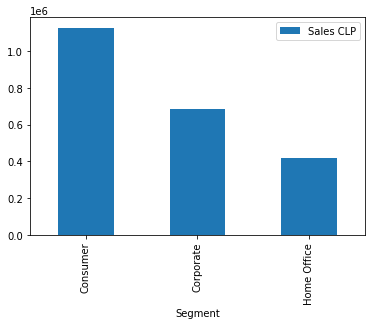

In [53]:
# Ejemplo: Mostrar total de ventas según segmento.
#  --- Descomentar:
data_barplot = data.groupby(["Segment"]).agg({"Sales CLP": "sum"})
display(data_barplot)
data_barplot.plot(kind="bar")

<a id="grafico-de-torta"></a>
### Gráfico de Torta
* Muestra la distribución de las frecuencias a través de dividir el área total de un círculo en partes que representen la frecuencia de cada categoría  en una variable cualitativa.
* No es recomendable usar gráficos de torta cuando:
  * Tengamos más de 5 categorías.
  * Las categorías tienen frecuencias muy similares.
  * Hay categorías con frecuencias demasiado pequeñas.
* Debemos especificar los argumentos `kind="pie"` y `subplots=True`.
* Si deseamos porcentajes, agregar `autopct="%1.1f%%"`. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f486356fa00>],
      dtype=object)

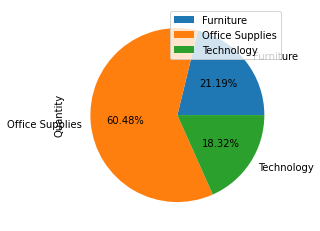

In [57]:
# Ejemplo de gráfico de torta, Cantidad de productos vendidos por categoría
data_pie = data.groupby("Category").agg({"Quantity": "sum"})
#display(data_pie)
data_pie.plot(kind="pie", subplots=True, autopct="%1.2f%%")

<a id="grafico-de-puntos"></a>
### Gráfico de Puntos
* Conocido también como scatter plot, gráfico de dispersión o dispersograma.
* Esta visualización se usa para encontrar relaciones y patrones existentes entre dos variables cuntitativas.
* Algunas relaciones comunes:
  * Lineal, logarítmica, exponencial, etc
  * De tipo fuerte o débil.
* Debemos agregar el argumento `kind="scatter"`.
* También podemos agregar argumentos como `c`, que hace referencia al color de los puntos, puede ser exactamente un color u otra variable. 
* Si estamos coloreando por una variable numérica, podemos especificar una paleta de colores con el argumento `cmap`. Paletas usuales son `Blues`, `viridis`, `magma` e `inferno`.

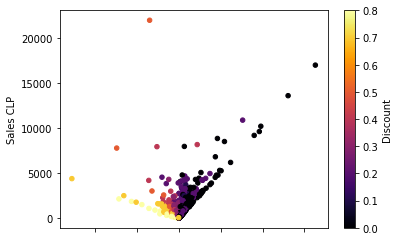

In [62]:
# Ejemplo: Realice un gráfico de puntos para las variables
# Profit y Sales, coloree según la variable Discount
data.plot(
    x = "Profit CLP", 
    y = "Sales CLP", 
    kind="scatter",
    c = "Discount",
    cmap = "inferno"
)

<a id="grafico-de-lineas"></a>
### Gráfico de Líneas
* También conocido como gráfico de tendencias.
* Se muestra a través de una serie de puntos conectados por una línea.
* Generalmente es usado para analizar comportamientos de una variable cuantitativa dentro de un intervalo de tiempo.
* Es el tipo de gráfico usado por defecto, pero si deseamos ser específicos agregamos `kind="line"`.
* Si deseamos añadir marcas en cada uno de los valores, agregar `marker="."`.

Order Weekday
Monday       7098
Tuesday      4234
Wednesday    1452
Thursday     5397
Friday       6895
Saturday     6349
Sunday       6446
Name: Quantity, dtype: int64


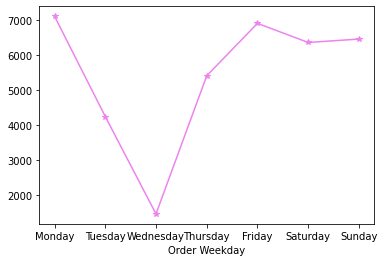

In [73]:
# Ejemplo: Análizar las tendencias de cantidad de ventas por día de la semana
orden = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data_lineas = data.groupby("Order Weekday")["Quantity"].sum()[orden]
print(data_lineas)
data_lineas.plot(kind="line", marker="*", color="violet") # o, ., *, etc

<a id="aspectos-esteticos-en-matplotlib"></a>
### Aspectos estéticos en matplotlib
* En `matplotlib` existen muchas posibilidades para customizar gráficos.
* En todos nuestros gráficos debemos procurar tener las etiquetas correctas, esto incluye la leyenda apropiada.
* Estas deben explicar la mayor cantidad de información posible sin perder simplicidad.
* Por ejemplo en un gráfico de puntos, debemos tener ambos ejes etiquetados y un título acorde.
  
```python
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "svg"
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (10, 8)

data.plot(...)
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Título")
```

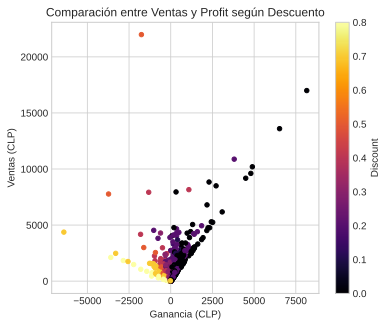

In [83]:
# Ejemplo: customizar gráfico de puntos hecho anteriormente
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "svg" # retina (png), default(png)
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (6, 5)

fig, ax = plt.subplots()

data.plot(
    x = "Profit CLP", 
    y = "Sales CLP", 
    kind="scatter",
    c = "Discount",
    cmap = "inferno",
    ax = ax
)
plt.title("Comparación entre Ventas y Profit según Descuento")
plt.xlabel("Ganancia (CLP)")
plt.ylabel("Ventas (CLP)")
fig.savefig("grafico.svg")

<a id="ejercicios-de-practica"></a>
### Ejercicios de práctica
* **Una solución**: en el siguiente [link](https://colab.research.google.com/drive/1mGo3jhFbnpkt4jCLTEoU4OuHFkheLH4N?usp=sharing).

La base de datos `gapminder` contiene información sobre distintos índices a lo largo del tiempo en la mayoría de los países del mundo, con el fin de promover el desarrollo global y desmentir mitos comunes sobre salud.
Algunas variables de la base de datos son:
* `country`: País.
* `year`: Año.
* `infanty_mortality`: Índice de mortalidad infantil.
* `life_expectancy`: Esperanza de vida en años.
* `fertility`: Índice de fertilidad.
* `population`: Población total del país.
* `gdp`: PIB anual del país medido en dólares.
* `continent`: Continente.
* `region`: Región.

A continuación, llevará a cabo un análisis en el que investigará sobre las diferencias en la esperanza de vida y PIB de acuerdo a la ubicación geográfica de los países.  


1. Cargue la base de datos `gapminder.xlsx` usando la funcion apropiada para cargar archivos de *Excel* y muestre las primeras observaciones. Recuerde importar `pandas` con el alias `pd`.

In [ ]:
# Responda aquí:


2. Muestre información de la base de datos con los métodos `describe` e `info`. ¿Qué aspectos destacan? ¿Y los valores faltantes?

In [ ]:
# Responda aquí:


3. Para el análisis, no tomaremos en cuenta el índice de fertilidad ni la región. Remueva estas variables de la base de datos.

In [ ]:
# Responda aquí:


4. Para ser consistentes, solo consideraremos la información disponible en un solo año. Filtre la base de datos para solo conservar las observaciones del año 2011.

In [ ]:
# Responda aquí:


5. ¿Cuántos países hay en cada continente? ¿De que forma esto puede afectar el análisis?

In [ ]:
# Responda aquí:


In [ ]:
# Esto afecta en que se deberían considerar estadísticos puntuales como la media o mediana.

6. Muestre una tabla y un gráfico de barras donde se diferencie el promedio de esperanza de vida en cada continente. ¿Qué es relevante en este análisis?

In [ ]:
# Responda aquí:


7. Para terminar, nos interesa comparar el PIB medio entre distintos contienentes. Sin embargo, esto carece de sentido ya que es de esperar que en cada país el PIB sea mayor a medida que su población lo sea. Para ello calcule el PIB per-cápita (PIB/población) de cada país y luego genere una tabla que permita comparar el PIB per-cápita medio entre continentes. Finalmente, compare a través de un gráfico de puntos, el PIB y PIB per-cápita de cada país.

In [ ]:
# Responda aquí:
